In [1]:
# importing libarary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import re

In [2]:
# loading data by using glob  & loop & concatenation all csv files
files = glob("states*")
us_census = pd.concat((pd.read_csv(file) for file in files ),ignore_index=True)
del us_census["Unnamed: 0"]

In [3]:
# look .dtypes and .columns
d_types=us_census.dtypes
print("Data types of us_census : \n",d_types)
print('___________________________________')
col= us_census.columns
print("Column of us_census : \n",col)

Data types of us_census : 
 State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object
___________________________________
Column of us_census : 
 Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop'],
      dtype='object')


In [4]:
# task 4 : look at the Data head Frame dtypes 
us_census.head(2).dtypes

State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object

In [5]:
us_census["Income"]=us_census["Income"].replace("\$"," ",regex=True)
us_census['Income'] = us_census['Income'].astype("float")
print("After conversion the Data type of income columns is  : ",us_census['Income'].dtypes)


After conversion the Data type of income columns is  :  float64


In [6]:
#us_census['Income']=us_census['Income'].replace('[/$]',"",regex=True)
#us_census['Income'] = pd.to_numeric(us_census['Income'])
#print(us_census.dtypes)

In [7]:
#us_census["Income"]
us_census['GenderPop'][0]

'2341093M_2489527F'

In [8]:
split_gender = us_census['GenderPop'].str.split('_', expand=True)
us_census["female"]=split_gender[1].str.extract('(\d+)',expand=True)
us_census["female"]=pd.to_numeric(us_census["female"])
us_census["Male"]=split_gender[0].str.extract('(\d+)',expand=True)
us_census["Male"]=pd.to_numeric(us_census["Male"])
us_census["female"]

0      2489527.0
1       349215.0
2      3342840.0
3      1506295.0
4     19334329.0
5      2630239.0
6      2630239.0
7      1841615.0
8       478041.0
9       340810.0
10    10045763.0
11     5123362.0
12     5123362.0
13      696428.0
14      806083.0
15     6556862.0
16     3333382.0
17     1558931.0
18     1558931.0
19     1453125.0
20     2233145.0
21     2364097.0
22      679019.0
23           NaN
24           NaN
25     3455936.0
26     5038598.0
27     2727005.0
28     1536358.0
29     3081445.0
30     3081445.0
31           NaN
32      939759.0
33     1390901.0
34      670717.0
35     4561386.0
36     4561386.0
37     1051703.0
38    10131373.0
39     5049925.0
40      353677.0
41     5913084.0
42     5913084.0
43     1942789.0
44     1990780.0
45     6534215.0
46     1869213.0
47      543273.0
48      543273.0
49     2455167.0
50      419713.0
51     3331859.0
52    13367298.0
53     1444150.0
54     1444150.0
55      318031.0
56     4195682.0
57     3497739.0
58      937789

In [9]:
us_census.dtypes

State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income       float64
GenderPop     object
female       float64
Male           int64
dtype: object

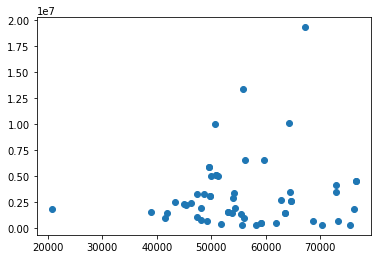

In [19]:
x=us_census["Income"]
y=us_census["female"]
plt.scatter(x,y)
plt.title=("State Income Vs female")
plt.show()

In [ ]:
us_census=[us_census["Female"].notnull()]

In [ ]:
valores=us_census["TotalPop"]-us_census["Male"]
us_census['Female']=us_census['Female'].fillna(value= valores)

In [ ]:
us_census.dtypes

In [ ]:
us_census['Female']

In [ ]:
us_census.Female.notnull().all()

In [ ]:
duplicated_row=us_census[us_census.duplicated()]
print(duplicated_row)

In [ ]:
plt.scatter(x='Female',y='Male')
plt.scatter(x='Female',y='Income')
plt.show()